In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [4]:
# Load the advanced statistics CSV file
adv_stats = pd.read_csv("adv_stats.csv")

# Load the per game statistics CSV file
per_game = pd.read_csv("per_game.csv")

In [5]:
# Display table
adv_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
2,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01
3,4,Santi Aldama,PF,23,MEM,61,1618,13.1,0.539,0.535,...,0.4,2.0,2.4,0.070,NaN,-0.7,0.4,-0.2,0.7,aldamsa01
4,5,Nickeil Alexander-Walker,SG,25,MIN,82,1921,10.9,0.578,0.623,...,1.5,2.8,4.3,0.107,NaN,-1.1,1.3,0.2,1.1,alexani01


In [6]:
# Remove the 'Rk' column and the 'Player-additional' column
per_game = per_game.drop(columns=['Rk', 'Player-additional'])

# Display table
per_game.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,24,TOT,74,18,21.9,3.2,6.3,0.501,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0


In [7]:
# Select only the desired columns from adv_stats
adv_stats_selected = adv_stats[['Player', 'TS%', '3PAr', 'USG%', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP']]

# Merge adv_stats_selected with per_game based on the 'Player' column
merged_data = pd.merge(per_game, adv_stats_selected, on='Player', how='inner')

# Replace NaN values with 0
merged_data.fillna(0, inplace=True)

# Display Table
merged_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,TS%,3PAr,USG%,WS,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,24,TOT,74,18,21.9,3.2,6.3,0.501,...,1.9,7.6,0.545,0.207,15.9,3.4,-1.7,0.3,-1.4,0.2
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,2.2,19.3,0.576,0.041,24.9,7.2,0.8,1.7,2.4,2.7
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,1.5,5.8,0.497,0.487,13.4,0.1,-3.5,-0.9,-4.4,-1.0
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,1.5,10.7,0.539,0.535,17.9,2.4,-0.7,0.4,-0.2,0.7
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,1.7,8.0,0.578,0.623,14.8,4.3,-1.1,1.3,0.2,1.1


In [8]:
# View Columns
merged_data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TS%', '3PAr',
       'USG%', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

## EDA

In [9]:
merged_data.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,PF,PTS,TS%,3PAr,USG%,WS,OBPM,DBPM,BPM,VORP
count,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000
mean,25.743007,46.153846,21.503497,18.650699,3.12028,6.683392,0.449584,0.940909,2.646329,0.299481,...,1.490909,8.423252,0.545093,0.399844,18.154021,2.208392,-1.564161,-0.178846,-1.74493,0.524476
std,4.225107,25.535953,26.906890,9.906921,2.45884,4.991255,0.113357,0.879363,2.241818,0.149458,...,0.787215,6.791411,0.113782,0.222779,6.291339,2.656750,3.912734,2.034533,5.21298,1.273904
min,19.000000,1.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-18.600000,-10.100000,-28.80000,-1.700000
25%,23.000000,22.000000,0.000000,10.800000,1.30000,3.000000,0.407750,0.200000,0.900000,0.255500,...,1.000000,3.400000,0.515500,0.270000,13.900000,0.200000,-3.100000,-1.000000,-3.60000,-0.100000
50%,25.000000,51.000000,7.000000,17.350000,2.40000,5.100000,0.452000,0.700000,2.100000,0.339000,...,1.500000,6.400000,0.565000,0.412000,17.100000,1.300000,-1.500000,-0.200000,-1.50000,0.000000
75%,28.000000,69.000000,41.250000,27.000000,4.50000,9.100000,0.500000,1.500000,3.825000,0.384000,...,2.100000,11.700000,0.602000,0.551000,21.700000,3.500000,0.425000,0.800000,0.80000,0.800000
max,39.000000,84.000000,82.000000,37.800000,11.50000,23.600000,0.747000,4.800000,11.800000,1.000000,...,3.600000,34.700000,0.917000,1.000000,72.500000,17.000000,29.100000,16.000000,43.30000,10.600000


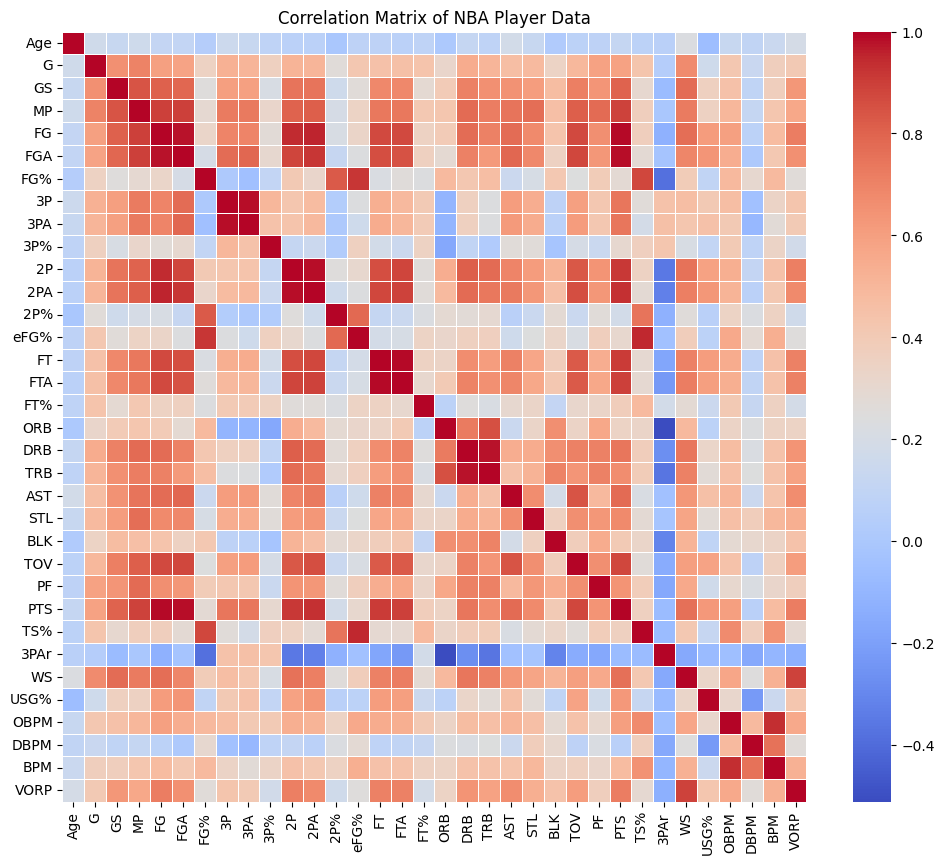

In [10]:
# Select relevant numerical columns for correlation analysis
numerical_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                     '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
                     'BLK', 'TOV', 'PF', 'PTS', 'TS%', '3PAr', 'WS', 'USG%', 'OBPM', 'DBPM', 'BPM', 'VORP']

# Create a correlation matrix
correlation_matrix = merged_data[numerical_columns].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of NBA Player Data')
plt.show()

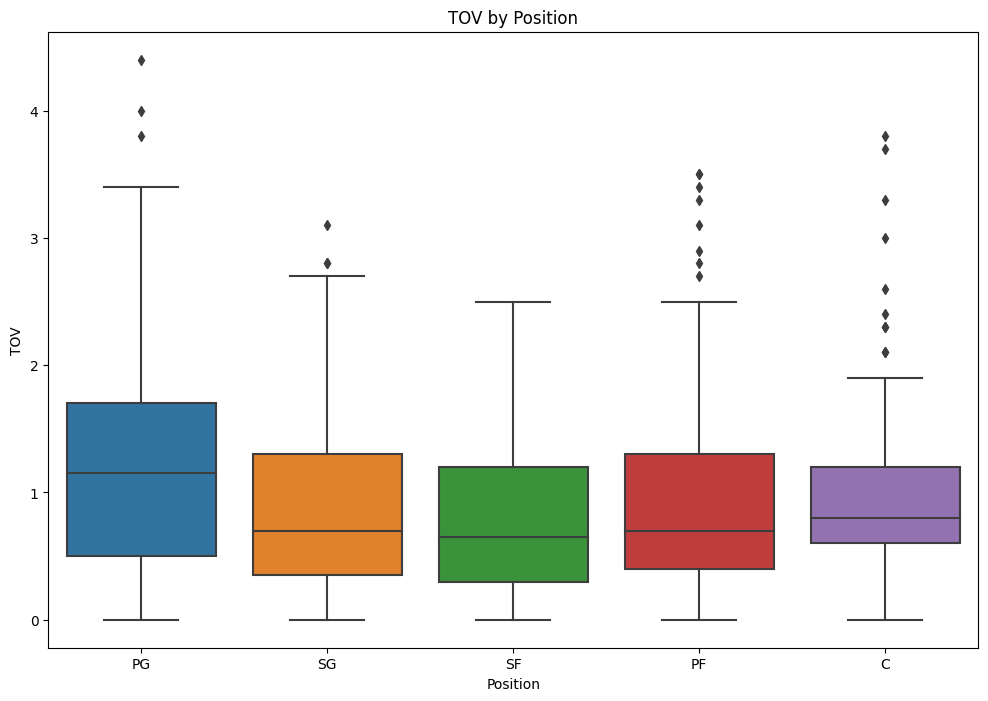

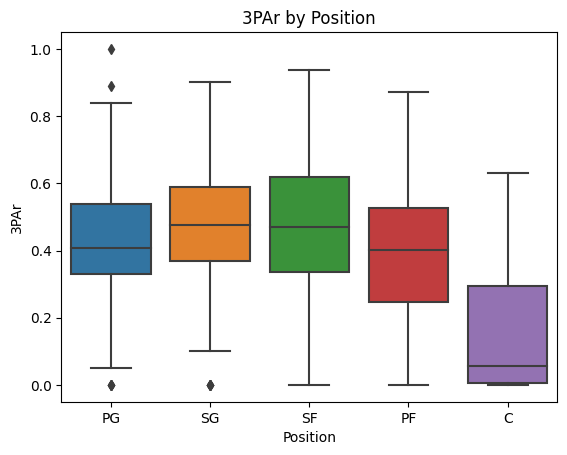

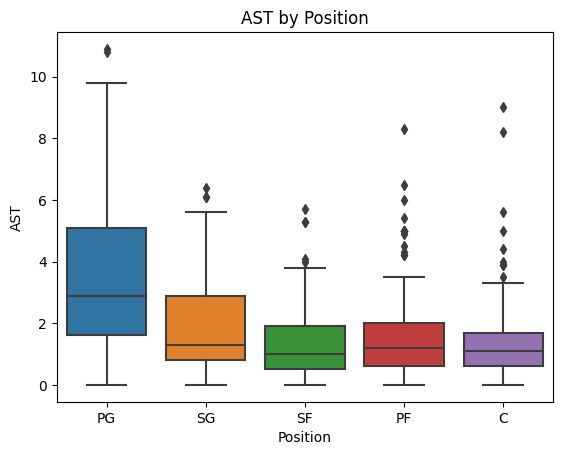

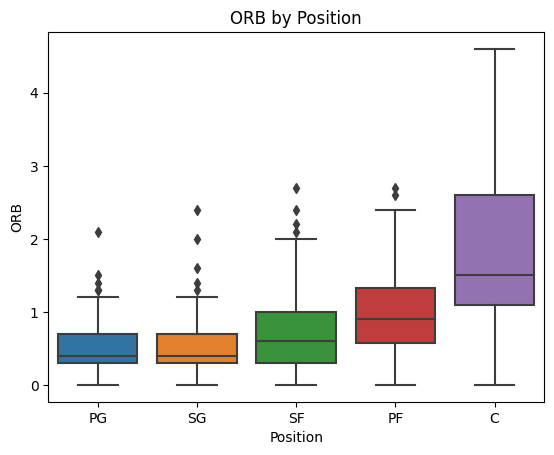

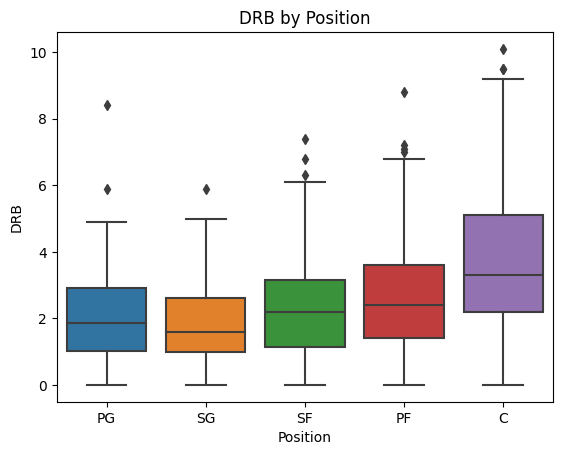

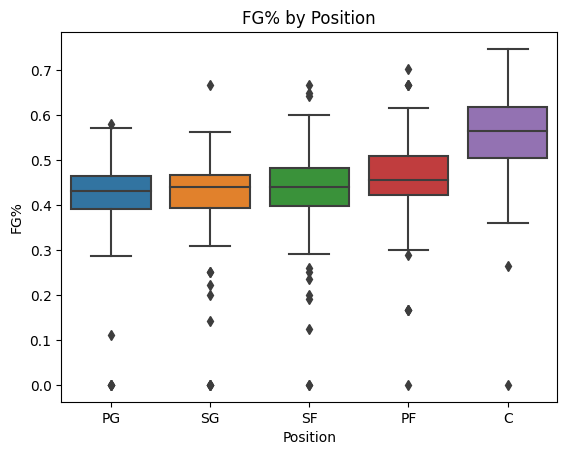

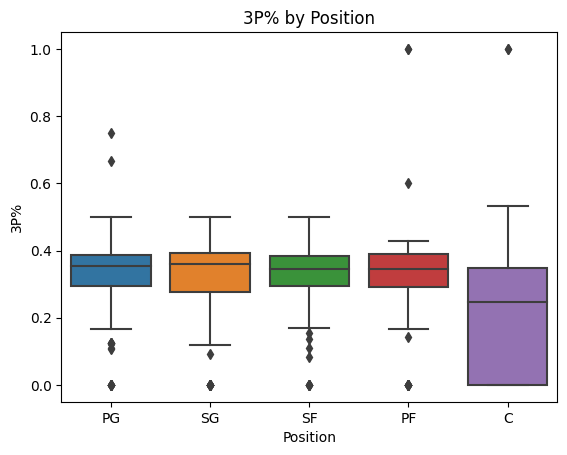

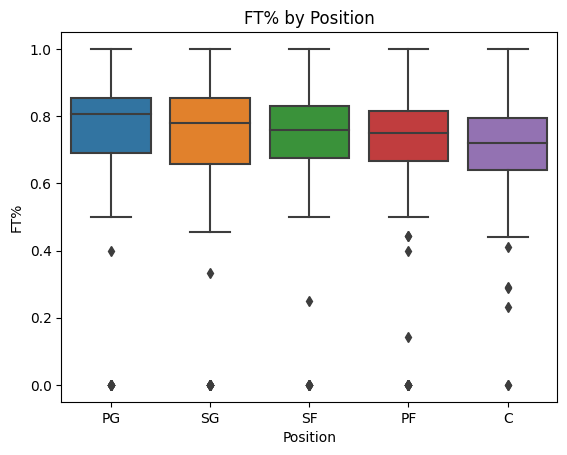

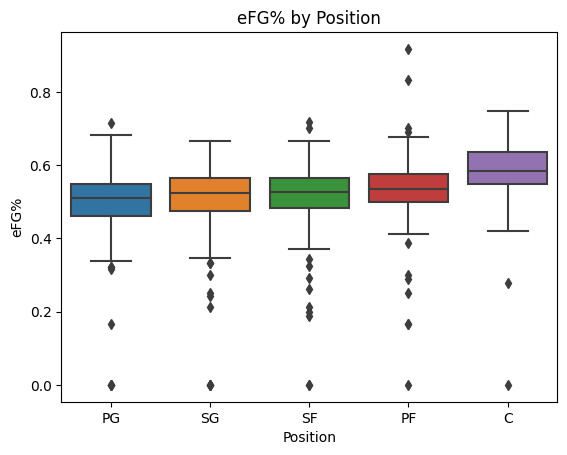

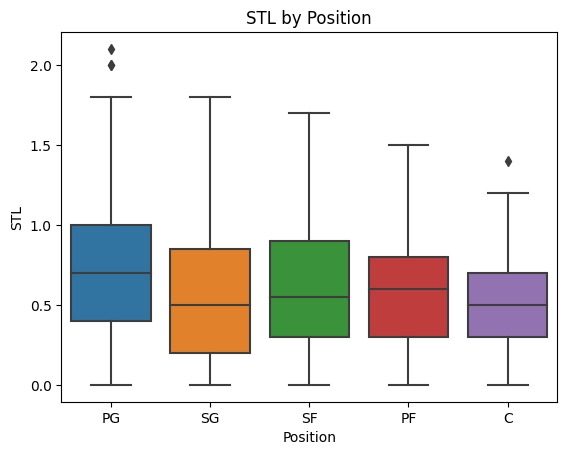

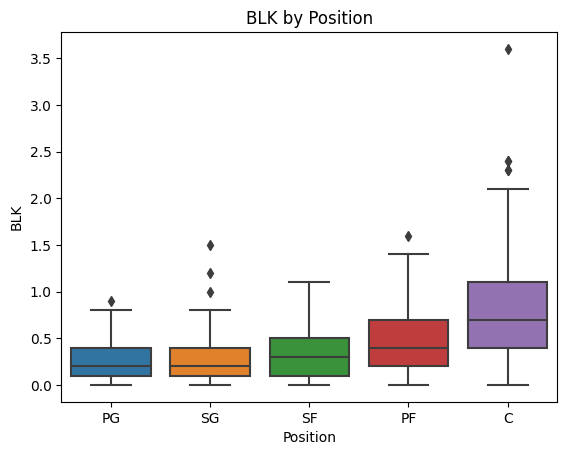

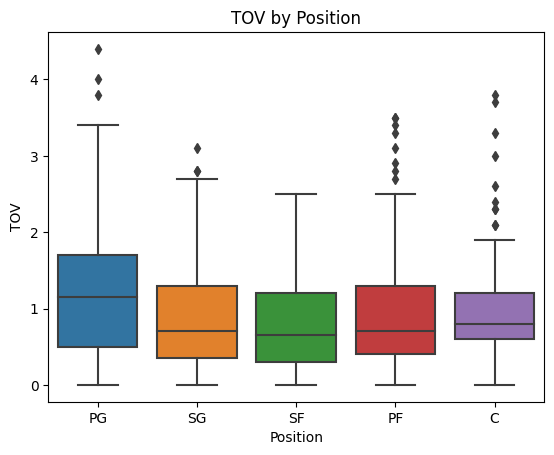

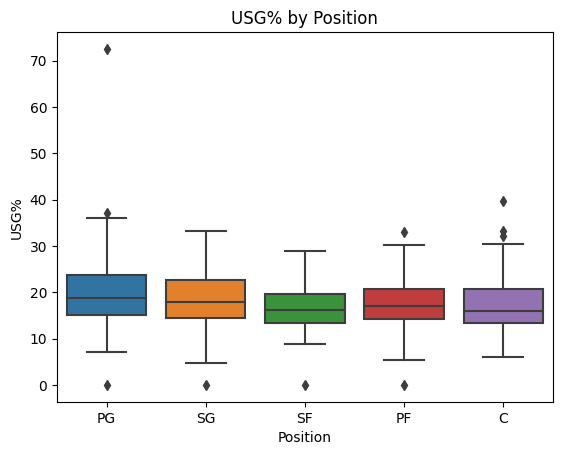

In [11]:
# Define the order of position groups
position_order = ['PG', 'SG', 'SF', 'PF', 'C']

# Group data by position
position_groups = merged_data.groupby('Pos')

# Define performance metrics to analyze
metrics = ['TOV', '3PAr', 'AST', 'ORB', 'DRB', 'FG%', '3P%', 'FT%', 'eFG%', 'STL', 'BLK', 'TOV', 'USG%']

# Plot performance metrics for each position
plt.figure(figsize=(12, 8))
for metric in metrics:
    sns.boxplot(x='Pos', y=metric, data=merged_data, order=position_order)
    plt.title(f'{metric} by Position')
    plt.xlabel('Position')
    plt.ylabel(metric)
    plt.show()

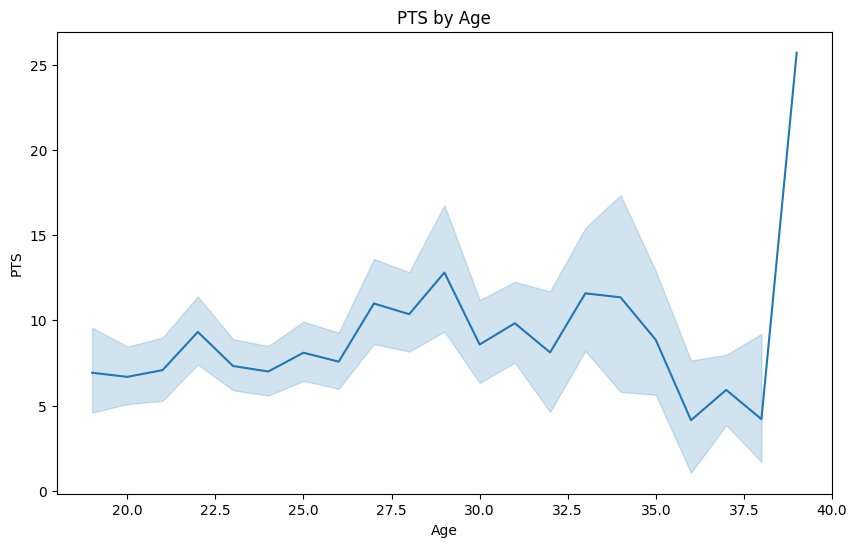

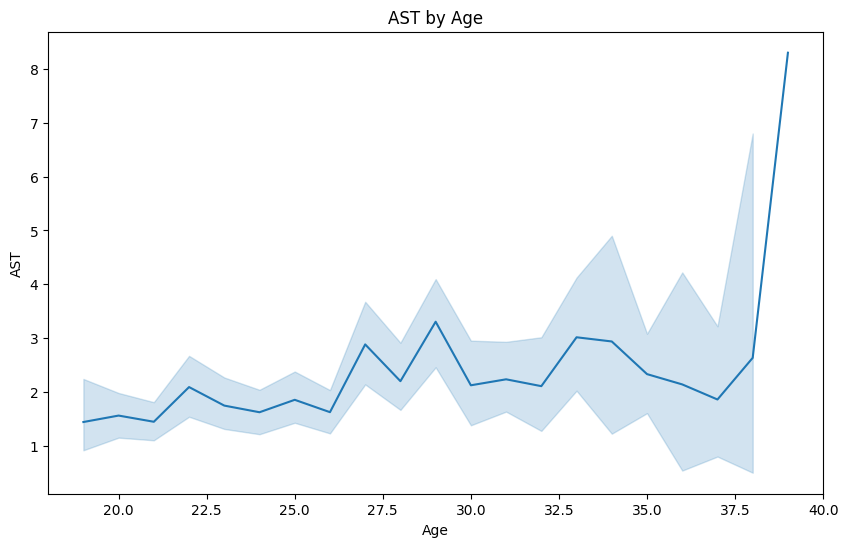

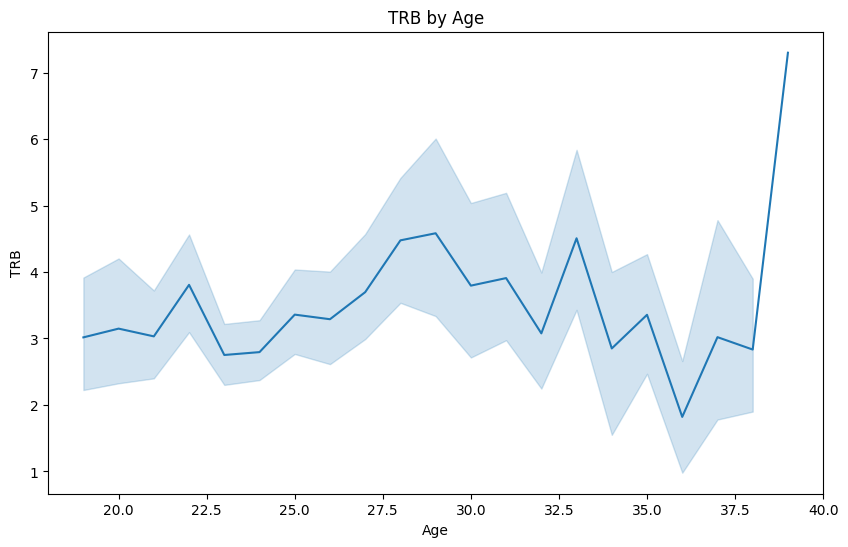

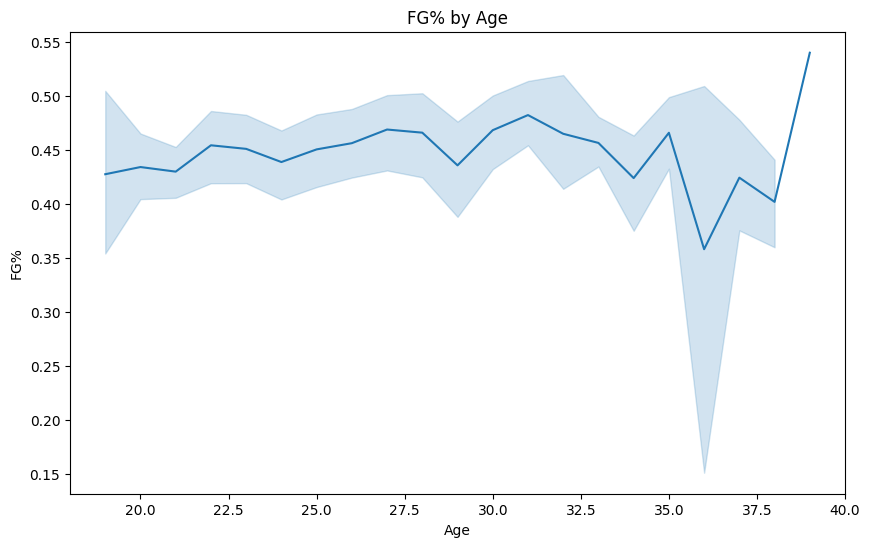

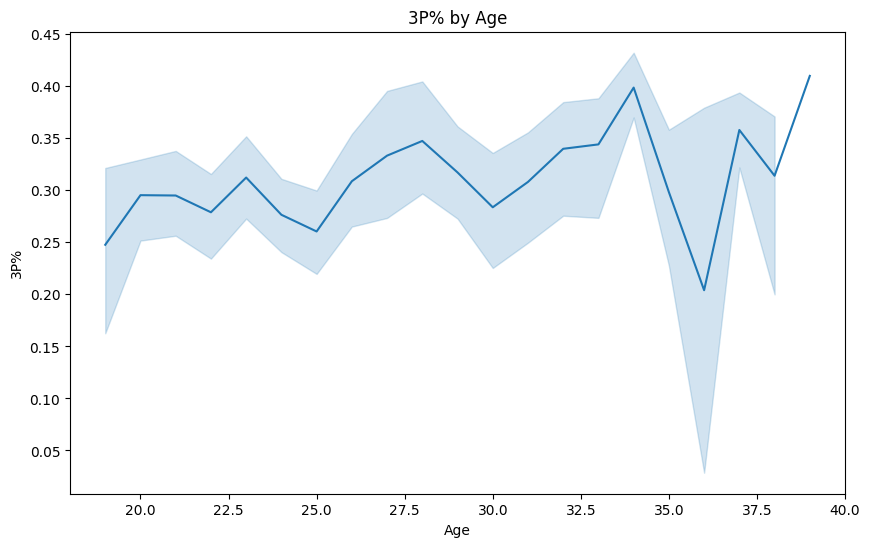

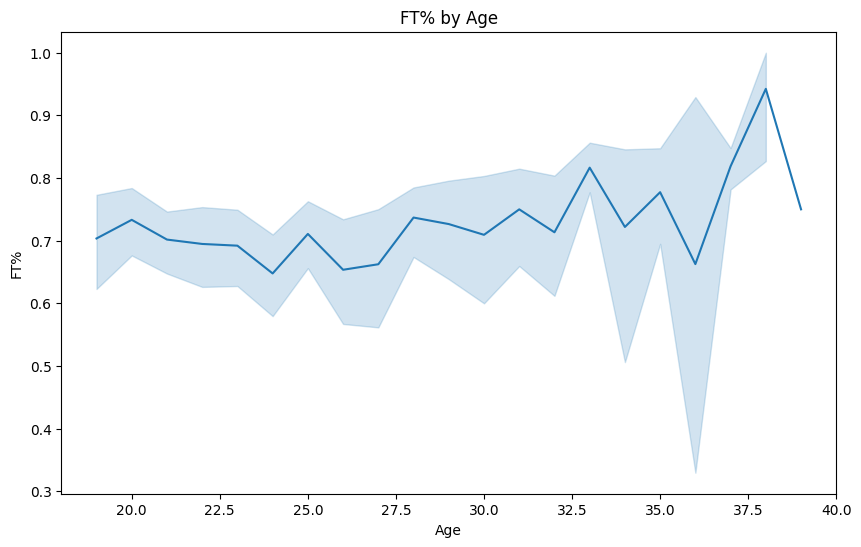

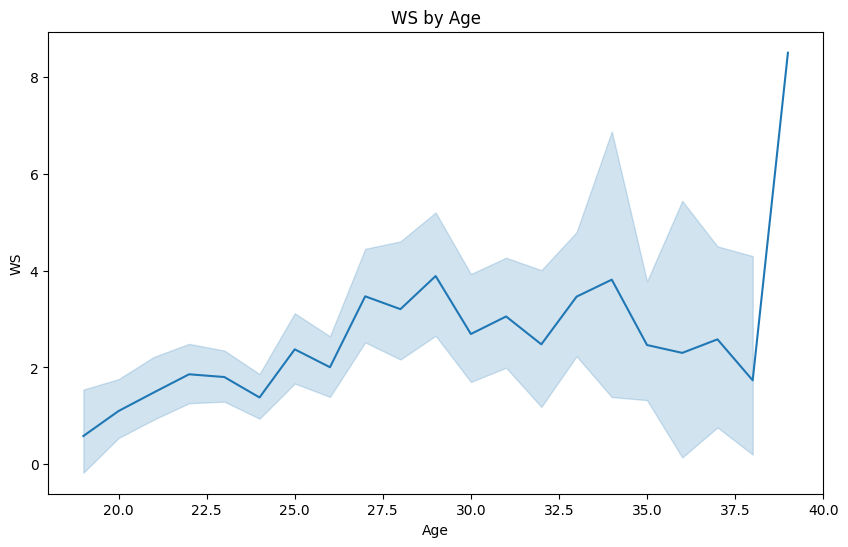

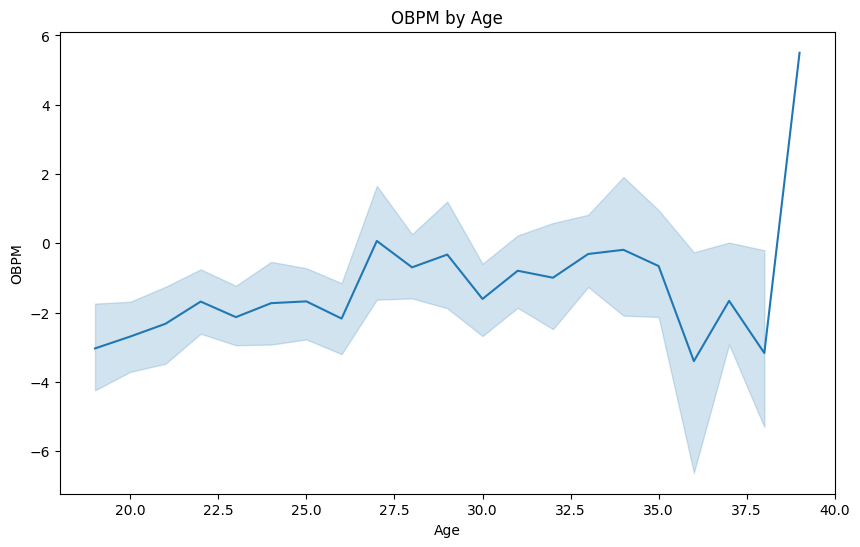

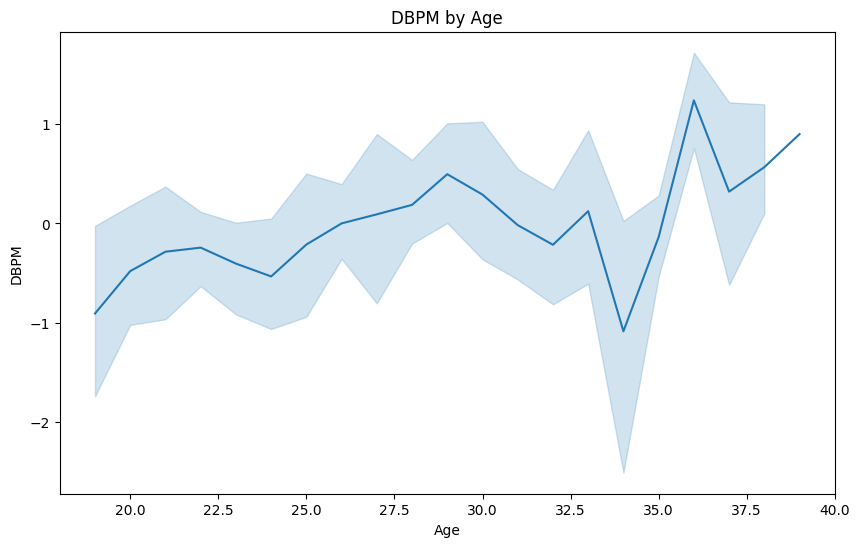

In [12]:
# Define performance metrics to analyze
metrics = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'WS', 'OBPM', 'DBPM']

# Plot performance metrics for each age
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Age', y=metric, data=merged_data)
    plt.title(f'{metric} by Age')
    plt.xlabel('Age')
    plt.ylabel(metric)
    plt.show()

## Data Analysis / Model Building

### Standard Supervised Machine Learning

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

2024-04-17 18:46:57.305978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Select relevant features and target variable
X = merged_data[['TOV', '3PAr', 'AST', 'ORB', 'DRB', 'FG%', '3P%', 'FT%', 'eFG%', 'STL', 'BLK', 'TOV', 'USG%']]  # Features
y = merged_data['Pos']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [16]:
# Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=3000),
    LinearSVC(),
    RidgeClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Iterate over each classifier and evaluate its performance using cross-validation
for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"{clf.__class__.__name__}: Mean Accuracy: {scores.mean()}, Std: {scores.std()}")

LogisticRegression: Mean Accuracy: 0.4912585812356979, Std: 0.03197176976251203


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increas

LinearSVC: Mean Accuracy: 0.43528604118993136, Std: 0.021797029698623634
RidgeClassifier: Mean Accuracy: 0.4475667429443173, Std: 0.014280887456378896
KNeighborsClassifier: Mean Accuracy: 0.39687261632341725, Std: 0.048025222986497765
DecisionTreeClassifier: Mean Accuracy: 0.4124790236460717, Std: 0.04193957495018817
GaussianNB: Mean Accuracy: 0.38276125095347063, Std: 0.04233625381902362
RandomForestClassifier: Mean Accuracy: 0.4719603356216629, Std: 0.02194690277860743
AdaBoostClassifier: Mean Accuracy: 0.43183829138062546, Std: 0.016689549961861186
GradientBoostingClassifier: Mean Accuracy: 0.4737452326468345, Std: 0.034678689086959584
SVC: Mean Accuracy: 0.36889397406559876, Std: 0.014262199221453201


In [17]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [250, 300, 350, 400],  # Number of trees in the forest
    'max_depth': [None, 8, 10, 12],  # Maximum depth of the trees
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split a node
    'min_samples_leaf': [3, 4, 5]  # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=16)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_random_forest = grid_search.best_estimator_
y_pred = best_random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.5217391304347826

Classification Report:
               precision    recall  f1-score   support

           C       0.82      0.70      0.76        20
          PF       0.47      0.35      0.40        20
          PG       0.62      0.43      0.51        23
          SF       0.35      0.46      0.40        24
          SG       0.50      0.64      0.56        28

    accuracy                           0.52       115
   macro avg       0.55      0.52      0.53       115
weighted avg       0.55      0.52      0.52       115



In [18]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                       min_samples_split=2, n_estimators=300,
                                       random_state=16)
random_forest.fit(X_train, y_train)

# Predict labels for training and validation sets
y_train_pred = random_forest.predict(X_train)
y_val_pred = random_forest.predict(X_test)

# Calculate accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.949671772428884
Validation Accuracy: 0.5217391304347826


### Feed Forward Neural Network

In [149]:
# Standardize the features by scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a dictionary mapping player positions to integer indices
position_mapping = {'PG': 0, 'SG': 1, 'SF': 2, 'PF': 3, 'C': 4}

# Convert string labels to integer indices using the mapping
y_train_encoded = np.array([position_mapping[label] for label in y_train])
y_test_encoded = np.array([position_mapping[label] for label in y_test])

# Convert integer indices to one-hot encoded format
num_classes = len(position_mapping)
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Define the FNN architecture
model = Sequential()
model.add(Dense(128, activation='swish', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.6))
model.add(Dense(num_classes, activation='softmax'))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print("Test Accuracy:", accuracy)

Epoch 1/100
7/7 [==============================] - 2s 33ms/step - loss: 1.6607 - accuracy: 0.2287 - val_loss: 1.5186 - val_accuracy: 0.2609
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 1.6067 - accuracy: 0.2457 - val_loss: 1.4498 - val_accuracy: 0.3696
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.5323 - accuracy: 0.2895 - val_loss: 1.3956 - val_accuracy: 0.4130
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.4734 - accuracy: 0.3552 - val_loss: 1.3492 - val_accuracy: 0.4783
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 1.4387 - accuracy: 0.3479 - val_loss: 1.3106 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 1.4022 - accuracy: 0.4088 - val_loss: 1.2819 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3749 - accuracy: 0.3966 - val_loss: 1.2616 - val_accuracy: 0.5000
Epoch 8/100
7/7 [=========

In [151]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_probabilities = model.predict(X_test)
y_pred = np.argmax(y_probabilities, axis=1)

# Generate a classification report
print(classification_report(y_test_encoded, y_pred))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        23
           1       0.49      0.61      0.54        28
           2       0.46      0.46      0.46        24
           3       0.56      0.45      0.50        20
           4       0.88      0.75      0.81        20

    accuracy                           0.57       115
   macro avg       0.60      0.57      0.58       115
weighted avg       0.59      0.57      0.58       115



### Cluster Analysis / Dimension Reduction

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
numbers = merged_data[['GS', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 
                   'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 
                   'TS%', '3PAr', 'USG%', 'WS', 'OBPM', 'DBPM', 'VORP']]

scaler = StandardScaler()
numbers = scaler.fit_transform(numbers)

In [103]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

wcss_scores = []
silhouette_scores = []

In [104]:
for num_clusters in k_values:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(numbers)
    
    # Compute WCSS (within-cluster sum of squares)
    wcss_scores.append(kmeans.inertia_)
    
    # Compute silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(numbers, labels)
    silhouette_scores.append(silhouette_avg)

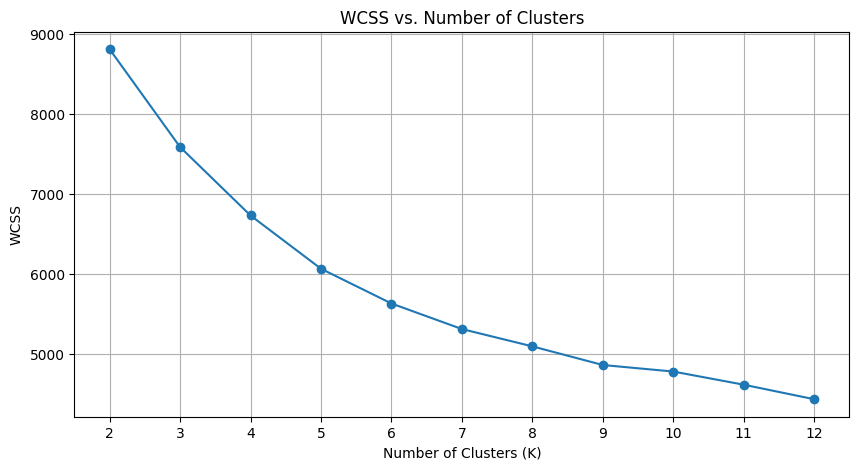

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

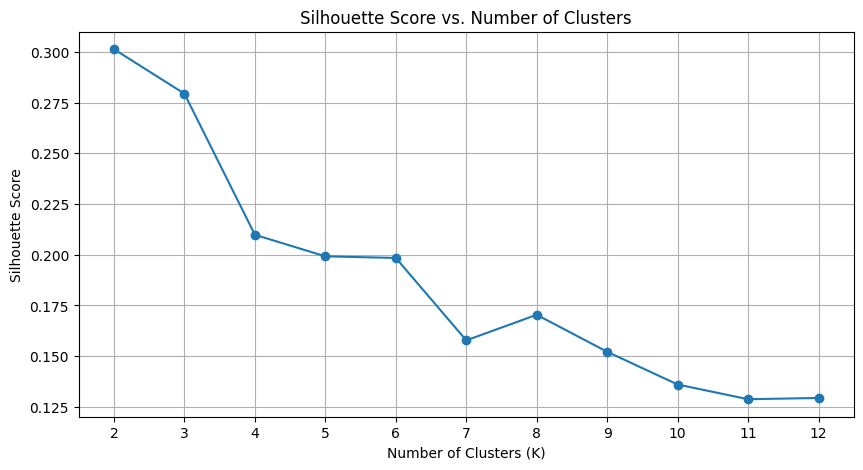

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

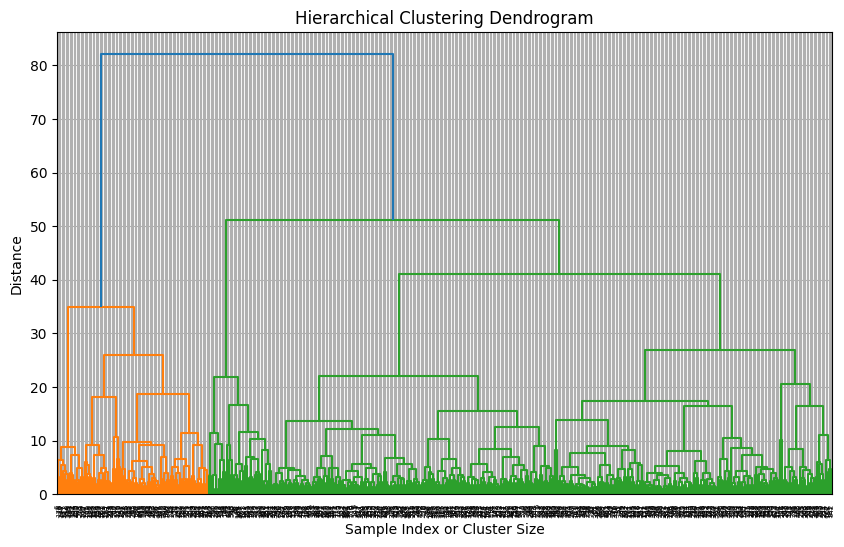

In [107]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(numbers, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


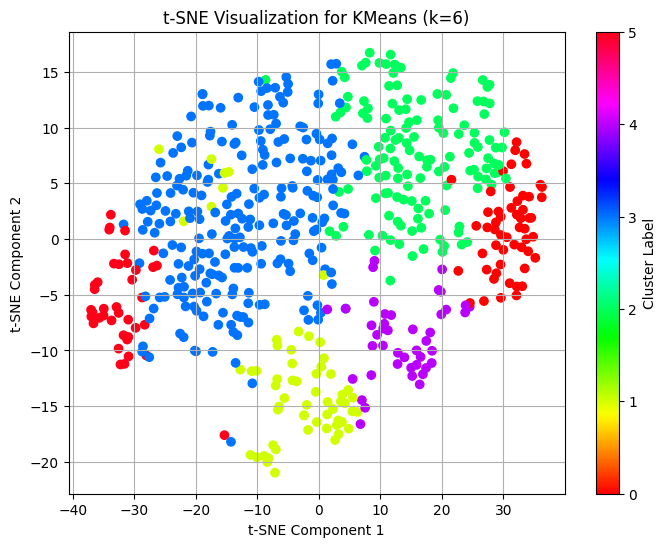

In [131]:
kmeans = KMeans(n_clusters=6, random_state=16)
cluster_labels = kmeans.fit_predict(numbers)
    
# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=16, init='pca', learning_rate='auto')
tsne_embeddings = tsne.fit_transform(numbers)
    
# Plot t-SNE embeddings colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cluster_labels, cmap='hsv')
plt.title(f't-SNE Visualization for KMeans (k={6})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [132]:
kmeans = KMeans(n_clusters=6, random_state=16, n_init=10)
kmeans.fit(numbers)

KMeans(n_clusters=6, random_state=16)

In [133]:
cluster_labels = kmeans.fit_predict(numbers)

# Compute mean or median values of features within each cluster
cluster_stats = merged_data.groupby(cluster_labels).mean()  # You can also use .median() for median values
cluster_stats[['GS', 'MP', 'FG%', '3PA', '3P%', '2P%', 
                   'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 
                   'TS%', 'USG%', 'WS', 'OBPM', 'DBPM', 'VORP']]

/var/folders/_r/wmlj9j2534l1q28t983gywph0000gn/T/ipykernel_86912/131319822.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = merged_data.groupby(cluster_labels).mean()  # You can also use .median() for median values


,GS,MP,FG%,3PA,3P%,2P%,FT%,ORB,DRB,AST,STL,BLK,TOV,PTS,TS%,USG%,WS,OBPM,DBPM,VORP
0,65.962963,34.148148,0.488704,5.675926,0.363704,0.541926,0.824889,1.251852,5.242593,5.683333,1.124074,0.748148,2.555556,23.420370,0.595167,28.087037,7.161111,3.572222,0.368519,3.412963
1,2.633333,9.016667,0.577650,0.316667,0.118300,0.653383,0.555183,0.875000,1.553333,0.640000,0.273333,0.330000,0.443333,3.240000,0.611183,15.280000,0.803333,-1.948333,0.551667,0.038333
2,42.088889,27.784444,0.457104,4.632593,0.367015,0.528963,0.791504,0.885185,3.296296,3.140741,0.853333,0.414815,1.487407,12.807407,0.571415,19.602222,3.168889,-0.437037,-0.288148,0.591852
3,5.215768,13.431535,0.421846,2.031120,0.337398,0.507651,0.743589,0.539834,1.548963,1.183817,0.453942,0.241909,0.561411,4.694606,0.537282,16.339419,0.843983,-2.283817,-0.167220,-0.039004
4,38.069767,24.188372,0.591930,0.988372,0.201023,0.626023,0.676140,2.539535,5.065116,1.667442,0.716279,1.172093,1.181395,10.553488,0.629651,17.011628,4.672093,0.211628,0.751163,1.081395
5,0.102564,6.543590,0.186821,0.789744,0.129769,0.208051,0.210538,0.300000,0.787179,0.474359,0.146154,0.141026,0.300000,1.148718,0.238000,16.282051,-0.097436,-9.497436,-2.779487,-0.092308


In [142]:
merged_data[cluster_labels == 5]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PF,PTS,TS%,3PAr,USG%,WS,OBPM,DBPM,BPM,VORP
7,Timmy Allen,SF,24,MEM,5,0,25.0,1.2,4.6,0.261,...,3.6,2.6,0.272,0.304,8.9,-0.1,-10.3,-0.7,-11.1,-0.3
14,Ryan Arcidiacono,PG,29,NYK,20,0,2.3,0.0,0.3,0.000,...,0.3,0.0,0.000,1.000,7.7,-0.1,-11.5,1.9,-9.6,-0.1
32,Emoni Bates,SF,20,CLE,15,0,8.9,1.0,3.3,0.306,...,0.3,2.7,0.404,0.673,19.5,-0.3,-6.2,-3.0,-9.2,-0.2
57,Jamaree Bouyea,PG,24,TOT,9,0,10.6,1.1,3.1,0.357,...,1.1,2.3,0.375,0.321,16.5,-0.3,-10.2,-2.0,-12.3,-0.2
63,Izaiah Brockington,PG,24,NOP,1,0,3.0,2.0,5.0,0.400,...,0.0,4.0,0.400,0.200,72.5,0.0,-9.2,-8.5,-17.8,0.0
68,Charlie Brown Jr.,SG,26,NYK,8,0,4.6,0.3,1.3,0.200,...,0.6,0.8,0.300,0.700,14.0,-0.1,-10.2,-3.4,-13.6,-0.1
91,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,-6.0,-3.2,-9.1,0.0
110,Jalen Crutcher,PG,24,NOP,1,0,3.0,0.0,1.0,0.000,...,0.0,0.0,0.000,0.000,14.5,0.0,-18.5,-7.8,-26.2,0.0
148,Adam Flagler,SG,24,OKC,2,0,7.0,0.5,3.5,0.143,...,0.0,1.5,0.214,0.857,21.7,0.0,-6.7,-3.9,-10.6,0.0
158,Andrew Funk,SG,24,CHI,5,0,2.6,0.0,0.8,0.000,...,0.0,0.0,0.000,0.750,13.5,-0.1,-12.4,-2.0,-14.4,0.0


Cluster 0: Key Players

Cluster 1: Reserve Players

Cluster 2: Back Court Players

Cluster 3: Key Reserve Players

Cluster 4: Front Court Players

Cluster 5: Bench Warmers
